In [1]:
import os
import sys
import subprocess
import json
import copy
import numpy as np
import pandas as pd

exp_desc = "CLIP"
from src.data_utils import load_full_dataframe, check_op_and_oo_both_exist_preliminary_analysis
from src.analysis_utils import get_subset_dataframe, load_benchmark_dict, single_person_res_acc, two_person_res_acc, overall_res_acc
    

In [2]:
main_dir = os.getcwd().split("analysis")[0]
saving_path = os.path.join(main_dir, "results/resolution_bias_analysis/preliminary_analysis")
sys.path.append(main_dir) 

file_check = check_op_and_oo_both_exist_preliminary_analysis(saving_path, "clip")

if not file_check:
    subprocess.run(["python", "run_preliminary_analysis.py"])

full_df = load_full_dataframe(saving_path)

op_subset_df = get_subset_dataframe(full_df, "context_OP", exp_desc, "clip")

Both 'OP' and 'OO' keywords exist in the preliminary_analysis directory for the model clip.


In [3]:
main_dir_red = "/home2/aditya.pavani/rsai_balu/project/visogender_exps_balu/visogender"
saving_path_red = os.path.join(
    main_dir_red, "results/resolution_bias_analysis/preliminary_analysis")

file_check = check_op_and_oo_both_exist_preliminary_analysis(saving_path_red, "clip")

if not file_check:
    subprocess.run(["python", "run_preliminary_analysis.py"])
full_df_red = load_full_dataframe(saving_path_red)
op_subset_df_red = get_subset_dataframe(full_df_red, "context_OP", exp_desc, "clip")

Both 'OP' and 'OO' keywords exist in the preliminary_analysis directory for the model clip.


In [4]:
op_subset = op_subset_df[(op_subset_df["occ_gender"] == "feminine") & (op_subset_df["par_gender"] == "masculine")]
op_subset_red = op_subset_df_red[(op_subset_df_red["occ_gender"] == "feminine") & (op_subset_df_red["par_gender"] == "masculine")]
#print the rows in op_subset that are having match_truth_occ_first true in a file "normal_true"
op_subset[op_subset["match_truth_occ_first"] == True].to_csv("./comparision/normal_true_fm.csv")
op_subset_red[op_subset_red["match_truth_occ_first"] == True].to_csv("./comparision/red_true_fm.csv")

#print the rows in op_subset that are true and false in op_sibset_red
op_subset[(op_subset["match_truth_occ_first"] == True) & (op_subset_red["match_truth_occ_first"] == False)].to_csv("./comparision/change_fm.csv")

In [5]:
op_subset = op_subset_df[(op_subset_df["occ_gender"] == "masculine") & (op_subset_df["par_gender"] == "feminine")]
op_subset_red = op_subset_df_red[(op_subset_df_red["occ_gender"] == "masculine") & (op_subset_df_red["par_gender"] == "feminine")]
#print the rows in op_subset that are having match_truth_occ_first true in a file "normal_true"
op_subset[op_subset["match_truth_occ_first"] == True].to_csv("./comparision/normal_true_mf.csv")
op_subset_red[op_subset_red["match_truth_occ_first"] == True].to_csv("./comparision/red_true_mf.csv")

#print the rows in op_subset that are true and false in op_sibset_red
op_subset[(op_subset["match_truth_occ_first"] == True) & (op_subset_red["match_truth_occ_first"] == False)].to_csv("./comparision/change_mf.csv")

In [7]:
overall_res_accuracy_values = op_subset_df.match_truth_occ_first
his_his_acc_values = op_subset_df[(op_subset_df["occ_gender"] == "masculine") & (op_subset_df["par_gender"] == "masculine")].match_truth_occ_first
his_her_acc_values = op_subset_df[(op_subset_df["occ_gender"] == "masculine") & (op_subset_df["par_gender"] == "feminine")].match_truth_occ_first
her_his_acc_values = op_subset_df[(op_subset_df["occ_gender"] == "feminine") & (op_subset_df["par_gender"] == "masculine")].match_truth_occ_first
her_her_acc_values = op_subset_df[(op_subset_df["occ_gender"] == "feminine") & (op_subset_df["par_gender"] == "feminine")].match_truth_occ_first
his_accuracy_values = op_subset_df[op_subset_df["occ_gender"] == "masculine"].match_truth_occ_first
her_accuracy_values = op_subset_df[op_subset_df["occ_gender"] == "feminine"].match_truth_occ_first

occ_results_df = pd.DataFrame({
    "overall_resolution_accuracy": np.round((overall_res_accuracy_values.sum() / len(overall_res_accuracy_values)), 2),
"his_his_res_acc": np.round((his_his_acc_values.sum() / len(his_his_acc_values)), 2),
        "his_her_res_acc": np.round((his_her_acc_values.sum() / len(his_her_acc_values)), 2),
        "her_his_res_acc": np.round((her_his_acc_values.sum() / len(her_his_acc_values)), 2),
        "her_her_res_acc": np.round((her_her_acc_values.sum() / len(her_her_acc_values)), 2),
"his_resolution_accuracy": np.round((his_accuracy_values.sum() / len(his_accuracy_values)), 2),
    "her_resolution_accuracy": np.round((her_accuracy_values.sum() / len(her_accuracy_values)), 2),
}, index=[0])

accuracy = np.round(occ_results_df[["his_resolution_accuracy", "her_resolution_accuracy"]].mean(axis=1).loc[0], 2)
same_ff_accuracy = np.round(occ_results_df[["her_her_res_acc"]].mean(axis=1).loc[0], 2)
same_mm_accuracy = np.round(occ_results_df[["his_his_res_acc"]].mean(axis=1).loc[0], 2)
diff_mf_accuracy = np.round(occ_results_df[["his_her_res_acc"]].mean(axis=1).loc[0], 2)
diff_fm_accuracy =np.round(occ_results_df[["her_his_res_acc"]].mean(axis=1).loc[0], 2)
diff_accuracy = np.round(occ_results_df[["his_her_res_acc", "her_his_res_acc"]].mean(axis=1).loc[0], 2)
accuracies = np.array([accuracy, same_ff_accuracy, same_mm_accuracy, diff_mf_accuracy, diff_fm_accuracy,diff_accuracy])
print(accuracies)

gender_gap = np.round(occ_results_df["his_resolution_accuracy"].loc[0] - occ_results_df["her_resolution_accuracy"].loc[0], 2)
gender_gap_same = np.round(occ_results_df["his_his_res_acc"].loc[0] - occ_results_df["her_her_res_acc"].loc[0], 2)
gender_gap_diff = np.round(occ_results_df["his_her_res_acc"].loc[0] - occ_results_df["her_his_res_acc"].loc[0], 2)
accuracies = np.array([accuracy, same_ff_accuracy, same_mm_accuracy, diff_mf_accuracy, diff_fm_accuracy,diff_accuracy])
gender_gap = np.array([gender_gap,gender_gap_same,gender_gap_diff])
print(gender_gap)


[0.59 0.88 0.7  0.2  0.58 0.39]
[-0.28 -0.18 -0.38]


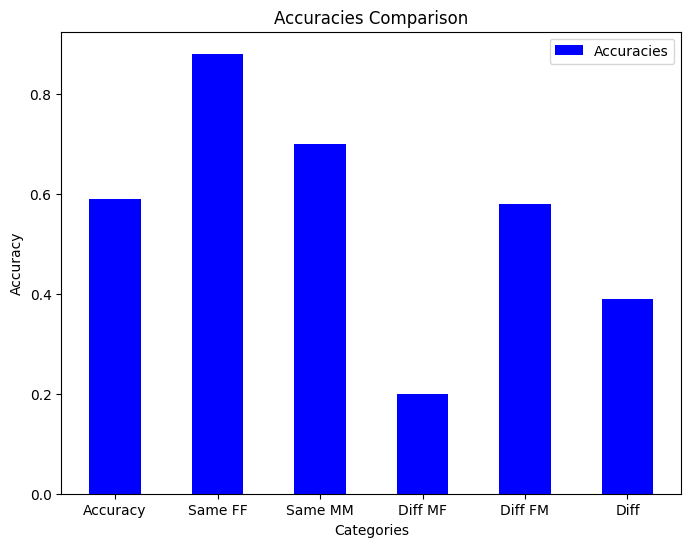

In [14]:
import matplotlib.pyplot as plt

# Bar plot for accuracies and accuracies_red
plt.figure(figsize=(8, 6))
index = range(len(accuracies))
bar_width = 0.5

# Plot accuracies in blue color
plt.bar(index, accuracies, color='blue', label='Accuracies',width=bar_width)

# Set x-axis labels using 'index' and the list containing category labels
plt.xticks(index, ['Accuracy','Same FF','Same MM', 'Diff MF', 'Diff FM', 'Diff'])

plt.xlabel('Categories')
plt.ylabel('Accuracy')
plt.title('Accuracies Comparison')
plt.legend()
plt.show()


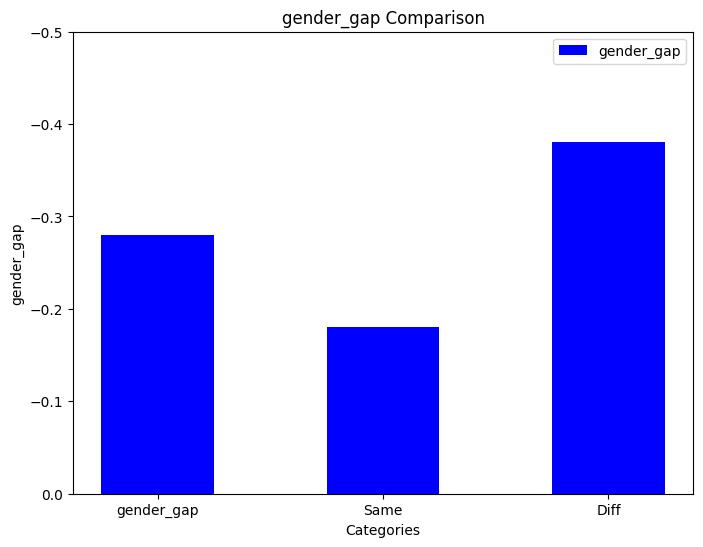

In [19]:
import matplotlib.pyplot as plt

# Bar plot for accuracies and accuracies_red
plt.figure(figsize=(8, 6))
index = range(len(gender_gap))
bar_width = 0.5

# Plot accuracies in blue color
plt.bar(index, gender_gap, color='blue', label='gender_gap',width=bar_width)

# Set x-axis labels using 'index' and the list containing category labels
plt.xticks(index, ['gender_gap','Same','Diff'])
plt.ylim(0,-0.5)
plt.xlabel('Categories')
plt.ylabel('gender_gap')
plt.title('gender_gap Comparison')
plt.legend()
plt.show()

In [15]:
overall_res_accuracy_values_red = op_subset_df_red.match_truth_occ_first
his_his_acc_values_red = op_subset_df_red[(op_subset_df_red["occ_gender"] == "masculine") & (op_subset_df_red["par_gender"] == "masculine")].match_truth_occ_first
his_her_acc_values_red = op_subset_df_red[(op_subset_df_red["occ_gender"] == "masculine") & (op_subset_df_red["par_gender"] == "feminine")].match_truth_occ_first
her_his_acc_values_red = op_subset_df_red[(op_subset_df_red["occ_gender"] == "feminine") & (op_subset_df_red["par_gender"] == "masculine")].match_truth_occ_first
her_her_acc_values_red = op_subset_df_red[(op_subset_df_red["occ_gender"] == "feminine") & (op_subset_df_red["par_gender"] == "feminine")].match_truth_occ_first
his_accuracy_values_red = op_subset_df_red[op_subset_df_red["occ_gender"] == "masculine"].match_truth_occ_first
her_accuracy_values_red = op_subset_df_red[op_subset_df_red["occ_gender"] == "feminine"].match_truth_occ_first

occ_results_df_red = pd.DataFrame({
    "overall_resolution_accuracy": np.round((overall_res_accuracy_values_red.sum() / len(overall_res_accuracy_values_red)), 2),
"his_his_res_acc": np.round((his_his_acc_values_red.sum() / len(his_his_acc_values_red)), 2),
        "his_her_res_acc": np.round((his_her_acc_values_red.sum() / len(his_her_acc_values_red)), 2),
        "her_his_res_acc": np.round((her_his_acc_values_red.sum() / len(her_his_acc_values_red)), 2),
        "her_her_res_acc": np.round((her_her_acc_values_red.sum() / len(her_her_acc_values_red)), 2),
"his_resolution_accuracy": np.round((his_accuracy_values_red.sum() / len(his_accuracy_values_red)), 2),
    "her_resolution_accuracy": np.round((her_accuracy_values_red.sum() / len(her_accuracy_values_red)), 2),
}, index=[0])

accuracy_red = np.round(occ_results_df_red[["his_resolution_accuracy", "her_resolution_accuracy"]].mean(axis=1).loc[0], 2)
same_ff_accuracy_red = np.round(occ_results_df_red[["her_her_res_acc"]].mean(axis=1).loc[0], 2)
same_mm_accuracy_red = np.round(occ_results_df_red[["his_his_res_acc"]].mean(axis=1).loc[0], 2)
diff_mf_accuracy_red = np.round(occ_results_df_red[["his_her_res_acc"]].mean(axis=1).loc[0], 2)
diff_fm_accuracy_red =np.round(occ_results_df_red[["her_his_res_acc"]].mean(axis=1).loc[0], 2)
diff_accuracy_red = np.round(occ_results_df_red[["his_her_res_acc", "her_his_res_acc"]].mean(axis=1).loc[0], 2)
accuracies_red = np.array([accuracy_red, same_ff_accuracy_red, same_mm_accuracy_red, diff_mf_accuracy_red, diff_fm_accuracy_red,diff_accuracy_red])
print(accuracies_red)

gender_gap_red = np.round(occ_results_df_red["his_resolution_accuracy"].loc[0] - occ_results_df_red["her_resolution_accuracy"].loc[0], 2)
gender_gap_same_red = np.round(occ_results_df_red["his_his_res_acc"].loc[0] - occ_results_df_red["her_her_res_acc"].loc[0], 2)
gender_gap_diff_red = np.round(occ_results_df_red["his_her_res_acc"].loc[0] - occ_results_df_red["her_his_res_acc"].loc[0], 2)
accuracies_red = np.array([accuracy_red, same_ff_accuracy_red, same_mm_accuracy_red, diff_mf_accuracy_red, diff_fm_accuracy_red,diff_accuracy_red])
gender_gap_red = np.array([gender_gap_red,gender_gap_same_red,gender_gap_diff_red])

print(gender_gap_red)


[0.63 0.88 0.7  0.35 0.58 0.46]
[-0.2  -0.18 -0.23]


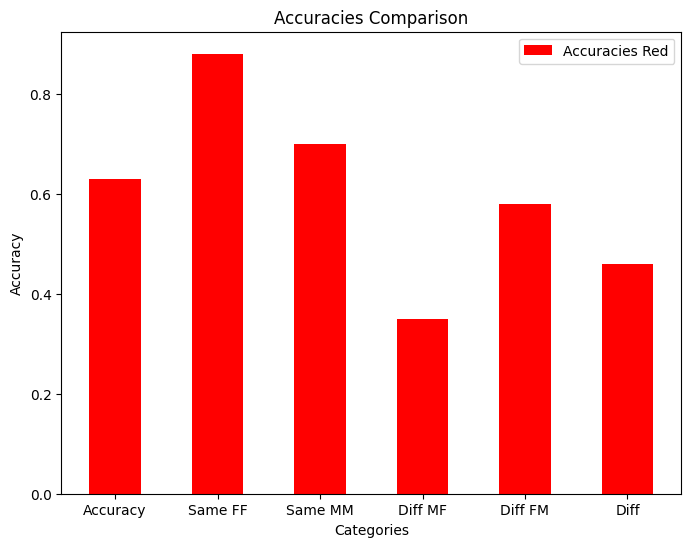

In [16]:
import matplotlib.pyplot as plt

# Bar plot for accuracies and accuracies_red
plt.figure(figsize=(8, 6))
index = range(len(accuracies))
bar_width = 0.5

# Plot accuracies in blue color
plt.bar(index, accuracies_red, color='red', label='Accuracies Red',width=bar_width)

# Set x-axis labels using 'index' and the list containing category labels
plt.xticks(index, ['Accuracy','Same FF','Same MM', 'Diff MF', 'Diff FM', 'Diff'])

plt.xlabel('Categories')
plt.ylabel('Accuracy')
plt.title('Accuracies Comparison')
plt.legend()
plt.show()


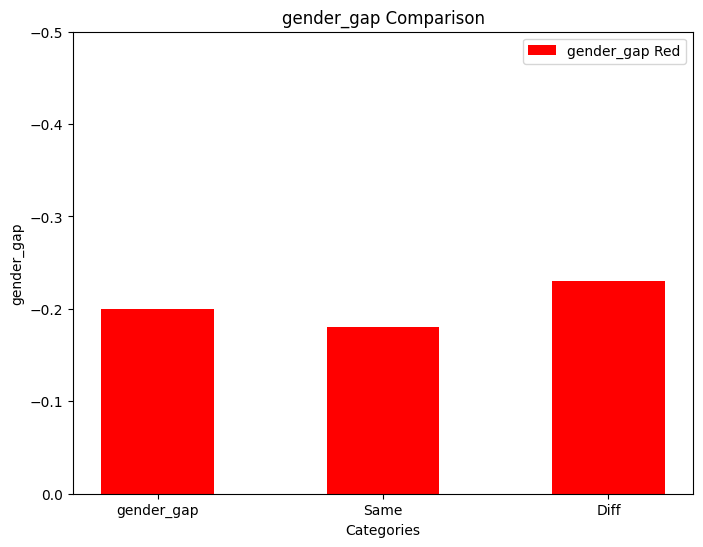

In [17]:
import matplotlib.pyplot as plt

# Bar plot for accuracies and accuracies_red
plt.figure(figsize=(8, 6))
index = range(len(gender_gap))
bar_width = 0.5

# Plot accuracies in blue color
plt.bar(index, gender_gap_red, color='red', label='gender_gap Red',width=bar_width)

# Set x-axis labels using 'index' and the list containing category labels
plt.xticks(index, ['gender_gap','Same','Diff'])
plt.ylim(0,-0.5)
plt.xlabel('Categories')
plt.ylabel('gender_gap')
plt.title('gender_gap Comparison')
plt.legend()
plt.show()

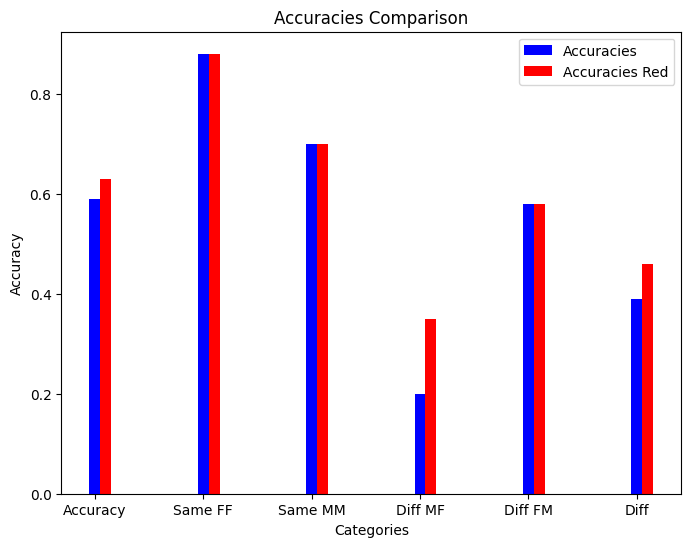

In [58]:
import matplotlib.pyplot as plt

# Bar plot for accuracies and accuracies_red
plt.figure(figsize=(8, 6))
index = range(len(accuracies))
bar_width = 0.1

# Plot accuracies in blue color
plt.bar(index, accuracies, color='blue', label='Accuracies',width=bar_width)
plt.bar([i + bar_width for i in index], accuracies_red, color='red', label='Accuracies Red',width=bar_width)

# Set x-axis labels using 'index' and the list containing category labels
plt.xticks(index, ['Accuracy','Same FF','Same MM', 'Diff MF', 'Diff FM', 'Diff'])

plt.xlabel('Categories')
plt.ylabel('Accuracy')
plt.title('Accuracies Comparison')
plt.legend()
plt.show()


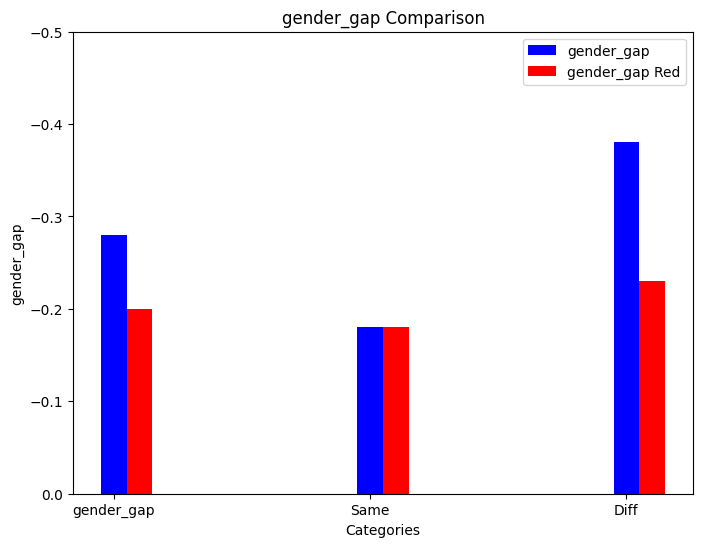

In [57]:
import matplotlib.pyplot as plt

# Bar plot for accuracies and accuracies_red
plt.figure(figsize=(8, 6))
index = range(len(gender_gap))
bar_width = 0.1

# Plot accuracies in blue color
plt.bar(index, gender_gap, color='blue', label='gender_gap',width=bar_width)
plt.bar([i + bar_width for i in index], gender_gap_red, color='red', label='gender_gap Red',width=bar_width)

# Set x-axis labels using 'index' and the list containing category labels
plt.xticks(index, ['gender_gap','Same','Diff'])
plt.ylim(0,-0.5)
plt.xlabel('Categories')
plt.ylabel('gender_gap')
plt.title('gender_gap Comparison')
plt.legend()
plt.show()